<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/334_training_YOLO_V8_EM_platelets_converted_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/ytlhMAF6ok0

# **Custom instance model training using YOLOv8**
<p>
This code walks you through the process of training a custom YOLO v8 model using your own data. Here, I am using a public dataset that shows multiple classes for segmentation. This is the same dataset from tutorial 330 (Detectron2) - https://youtu.be/cEgF0YknpZw

<p>
Dataset from: https://leapmanlab.github.io/dense-cell/
<br>
Direct link to the dataset: https://www.dropbox.com/s/68yclbraqq1diza/platelet_data_1219.zip

**Data courtesy of:**
Guay, M.D., Emam, Z.A.S., Anderson, A.B. et al. ​
Dense cellular segmentation for EM using 2D–3D neural network ensembles. Sci Rep 11, 2561 (2021). ​
<p>
To prepare this dataset for YOLO, the binary masks were converted to the YOLO format. Please follow this tutorial to learn about this process. <br>
(https://youtu.be/NYeJvxe5nYw)

<p>

If you already have annotations in COCO format JSON file, for example by annotating using makesense (https://www.makesense.ai/) then the annotations can be imported to Roboflow for conversion to YOLO format. Otherwise, if you are starting from scratch, just annotate datasets on Roboflow. (https://roboflow.com/). You just need to upload your images along with the JSON file and Roboflow will convert them to any other format, in our case YOLO v8. <p>

For information about YOLO models: <p>
https://docs.ultralytics.com/models/yolov8/#key-features
<p>


**Install the required libraries:**

Let us start by installing ultralytics library. All other libraries should be pre-installed on colab. If you are working on a local system, please make sure you install matplotlib, Pillow, numpy, Seaborn, and roboflow. You may also want to install pandas and other libraries depending on the task.

In [29]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

**Import a model and populate it with pre-trained weights.**
<p>
Here, we are importing an instance segmentation model with weights. For a list of pre-trained models, checkout: https://docs.ultralytics.com/models/yolov8/#key-features

In [30]:
#Instance
# model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

model = YOLO('yolov8n.pt')


In [31]:
# define number of classes based on YAML
import yaml
with open("/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

**Train the model**

In [32]:
#Define a project --> Destination directory for all results
project = "/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [33]:
# Train the model
results = model.train(data='/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/data.yaml',
                      project=project,
                      name=name,
                      epochs=20,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.1.1 🚀 Python-3.8.10 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i9-11900K 3.50GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/data.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results, name=200_epochs-3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/train/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
val: Scanning /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]

Plotting labels to /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.698      3.085      1.748         10        800: 100%|██████████| 15/15 [00:10<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         17         17    0.00333          1      0.776      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.035      2.058      1.295         11        800: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         17         17    0.00333          1      0.812       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.021      1.879      1.266         10        800: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         17         17      0.825      0.647      0.852      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.052      1.798      1.316          9        800: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         17         17    0.00333          1      0.694      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.9924      1.881      1.245          8        800: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         17         17       0.67      0.717      0.791      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.023      1.753      1.233         12        800: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         17         17      0.433      0.647      0.421      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G       1.09      1.727        1.3         13        800: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         17         17      0.867      0.767      0.933      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.062      1.651      1.261          9        800: 100%|██████████| 15/15 [00:09<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         17         17      0.786      0.765      0.894      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.089      1.518      1.244          9        800: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         17         17      0.707      0.996      0.883      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.9524      1.526      1.196         10        800: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         17         17       0.89      0.824      0.951      0.665


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G       1.03      2.579      1.456          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         17         17       0.89      0.824      0.951      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.021      2.568      1.387          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         17         17      0.903      0.882       0.96      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.8973      2.424      1.349          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         17         17      0.941          1      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.023      2.298      1.528          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         17         17      0.994          1      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.9922       2.24      1.456          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         17         17      0.975          1      0.995      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.9594      2.086      1.356          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         17         17      0.999          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.9006      2.047      1.344          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         17         17      0.995          1      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      0.861      1.997      1.291          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         17         17      0.996          1      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.8147      1.981      1.209          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         17         17      0.995          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.7737      1.966      1.282          4        800: 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         17         17      0.994          1      0.995      0.793



20 epochs completed in 0.063 hours.
Optimizer stripped from /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3/weights/last.pt, 6.3MB
Optimizer stripped from /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3/weights/best.pt, 6.3MB

Validating /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.8.10 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i9-11900K 3.50GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]


                   all         17         17      0.995          1      0.995       0.81
Speed: 1.6ms preprocess, 53.0ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3


All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [34]:
from IPython.display import Image

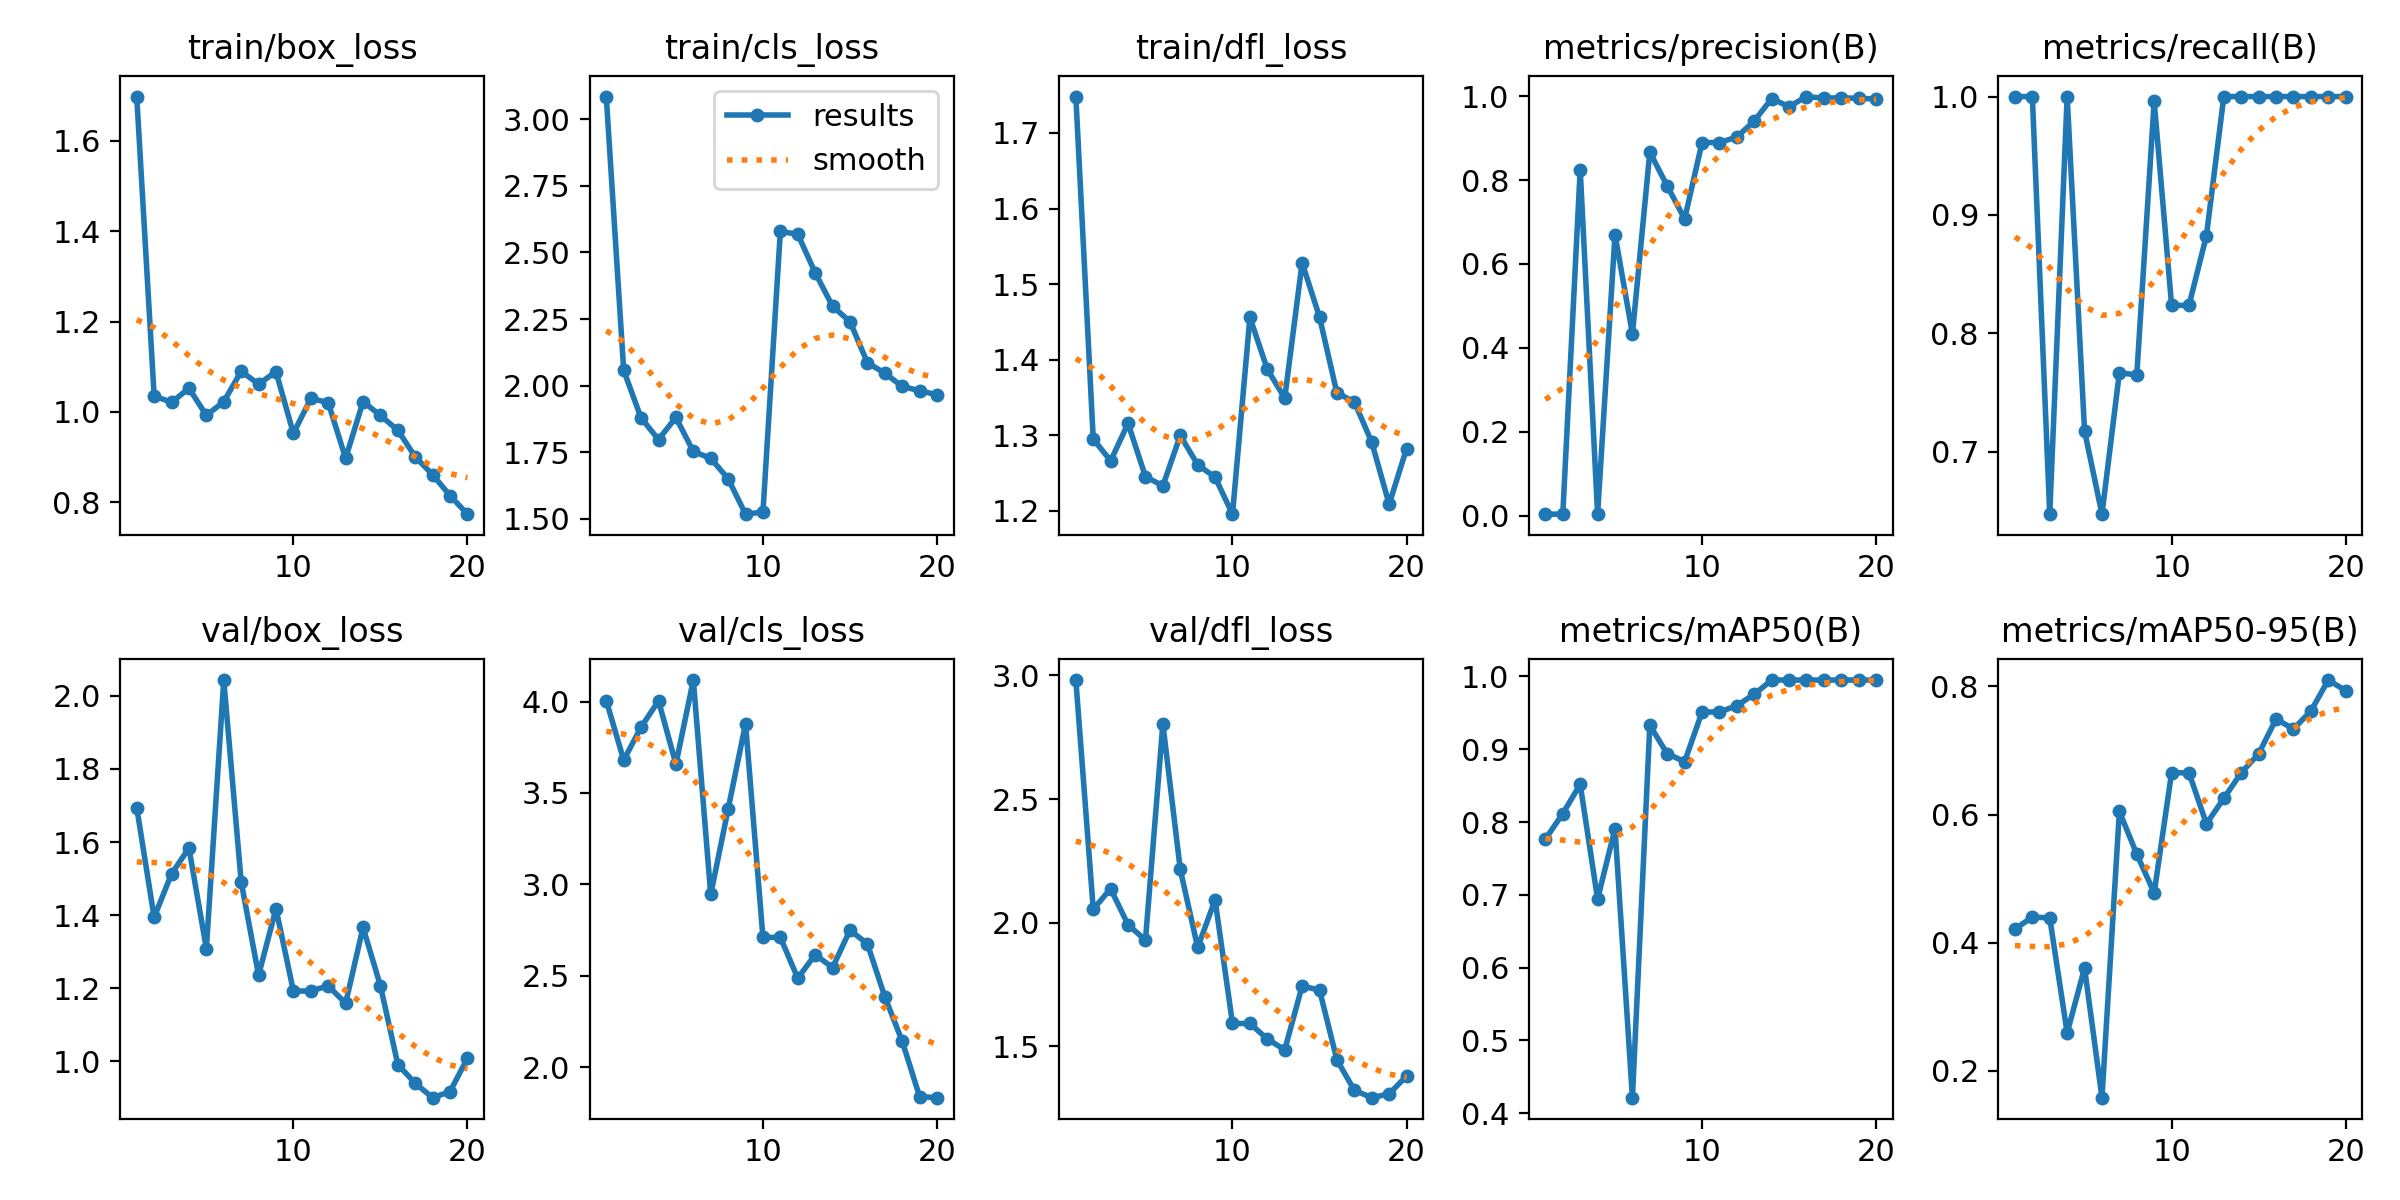

In [35]:
Image("/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3/results.png")

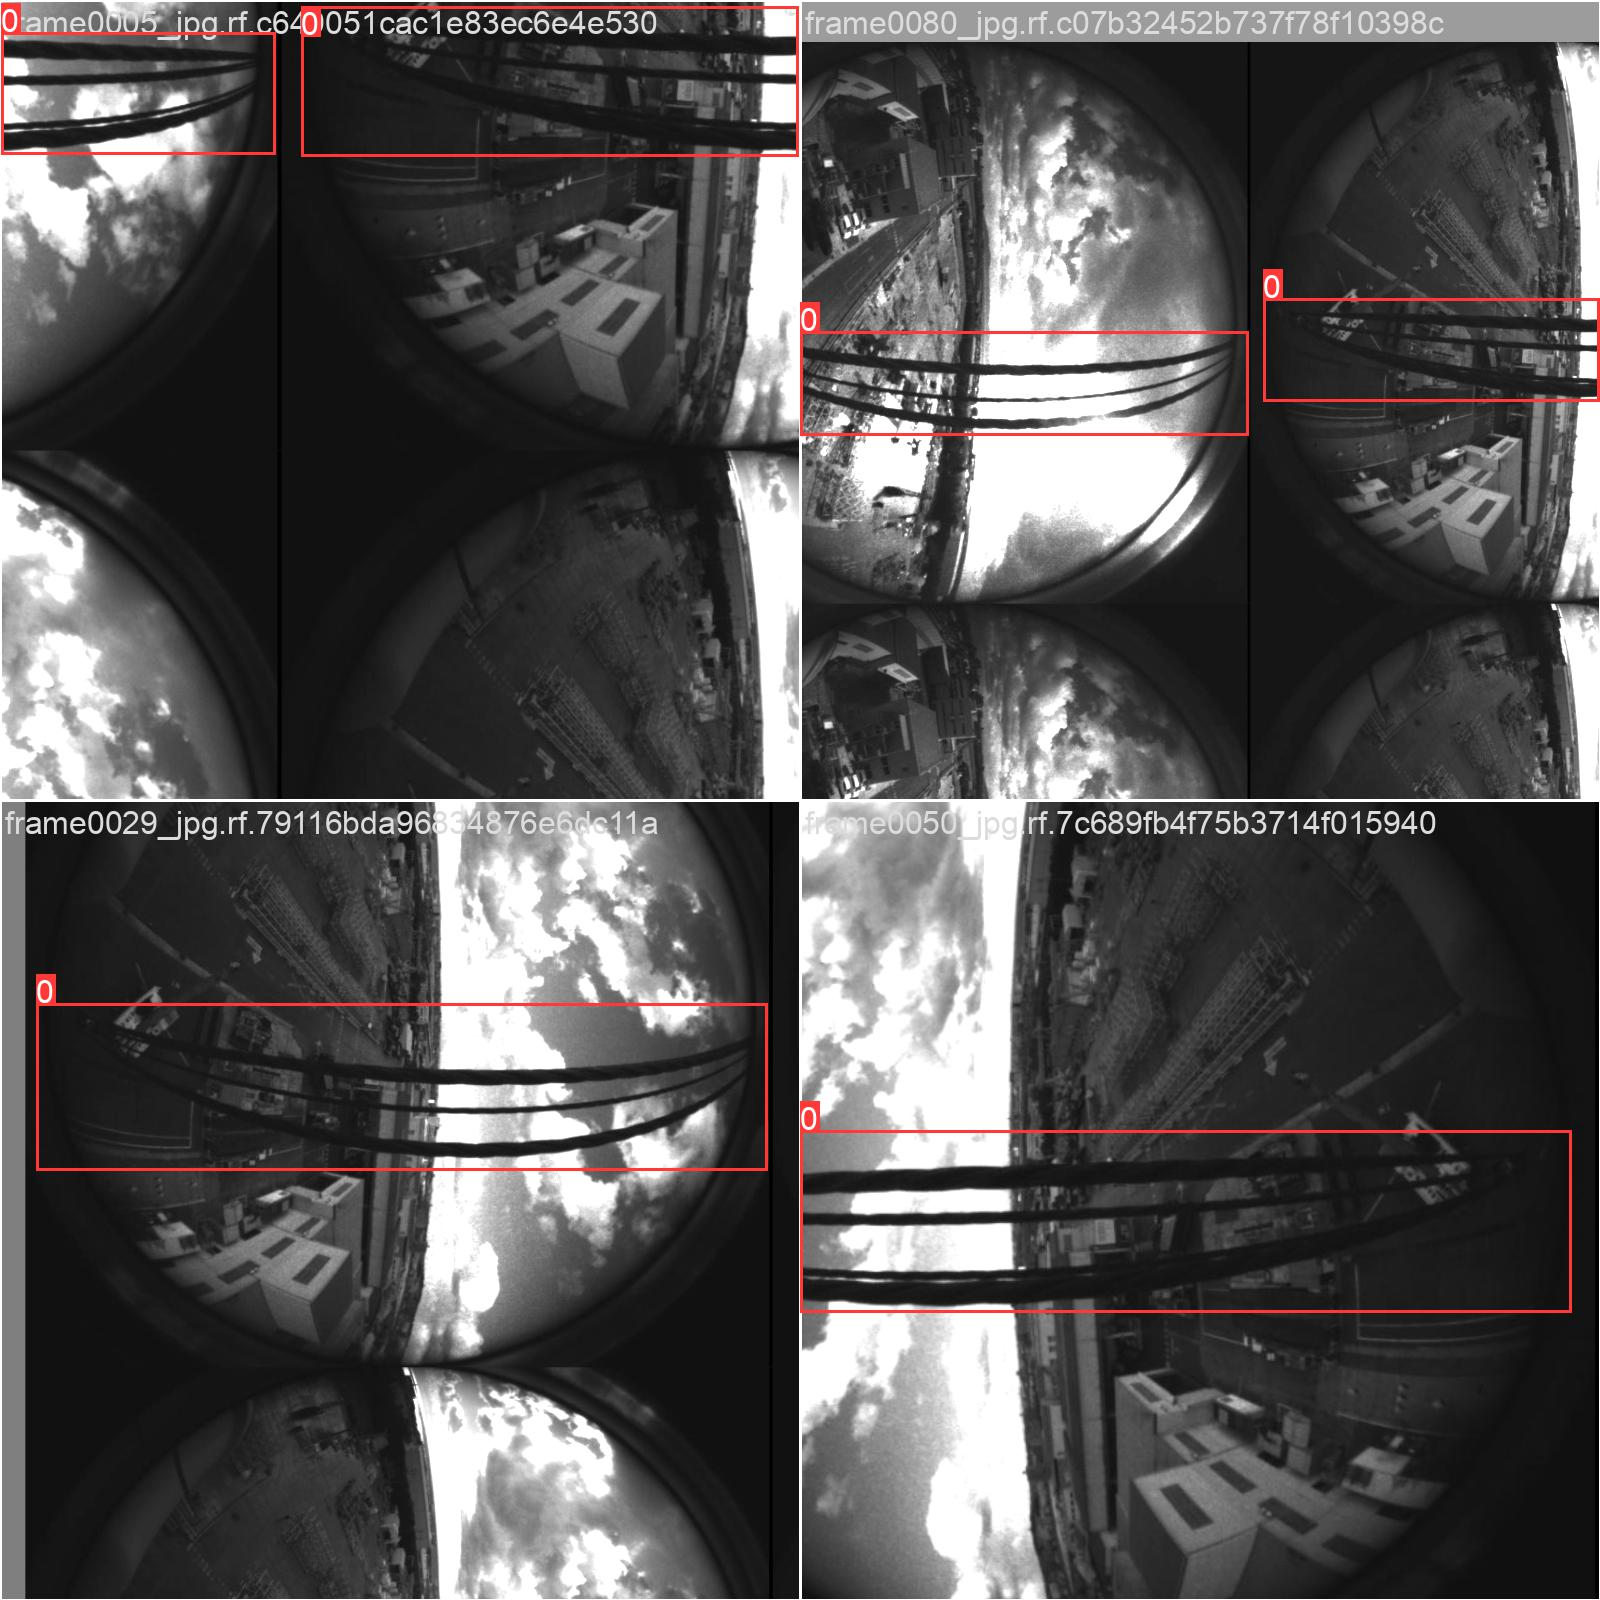

In [37]:
Image(filename='/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results/200_epochs-3/train_batch0.jpg', width=900)

**Run inference**

Now that our model is trained, we can use it for inference.

In [38]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results//200_epochs-3/weights

best.pt  last.pt


You can load the best model or the latest. I am picking the latest.

In [41]:
my_new_model = YOLO('/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/results//200_epochs-3/weights/best.pt')

Load an image and perform inference (segmentation).

In [50]:
new_image = '/media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/train/images/frame0000_jpg.rf.a7ae120001e29a32c98159bf1e203c75.jpg'
new_results = my_new_model.predict(new_image)  #Adjust conf threshold
print(new_results)



image 1/1 /media/aisl2/aisl_data/backup/code_ws/yolo_v8/data_set_yolov8/train/images/frame0000_jpg.rf.a7ae120001e29a32c98159bf1e203c75.jpg: 768x800 1 rope, 47.1ms
Speed: 3.9ms preprocess, 47.1ms inference, 0.5ms postprocess per image at shape (1, 3, 768, 800)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'rope'}
obb: None
orig_img: array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [

The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

In [51]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

**Extracting bounding boxes and segmented masks from the result**

In [52]:
new_result = new_results[0]

In [53]:
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'rope'}
obb: None
orig_img: array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [ 0,  0,  0],
        [ 4,  4,  4],
        [ 1,  1,  1]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,

**Extracting bounding polygons** <p>
Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels)

In [54]:
new_result.masks.xyn

AttributeError: 'NoneType' object has no attribute 'xyn'

**Extracting segmented masks**

In [ ]:
extracted_masks = new_result.masks.data

In [ ]:
extracted_masks.shape

torch.Size([144, 800, 800])

Push the mask to cpu (from GPU) and convert to numpy array for easy plotting.

In [ ]:
masks_array = extracted_masks.cpu().numpy()

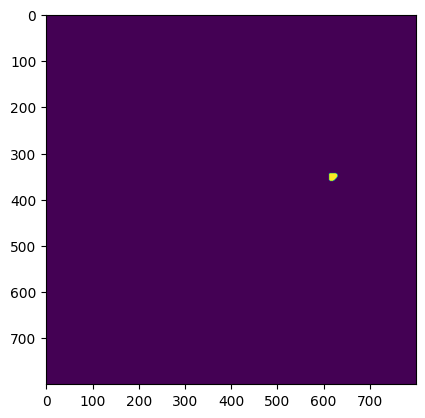

In [ ]:
plt.imshow(masks_array[9])

**Extracting labels for each class**

In [ ]:
class_names = new_result.names.values()
class_names

dict_values(['Alpha', 'Cells', 'Mito', 'Vessels'])

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


Class Name: Alpha, Number of Masks: 34
Class Name: Cells, Number of Masks: 24
Class Name: Mito, Number of Masks: 1
Class Name: Vessels, Number of Masks: 85


**Extracting masks for a specific class**

In [ ]:
alpha_granule_masks = masks_by_class['Alpha']
cell_masks = masks_by_class['Cells']

In [ ]:
# Extract the original image
orig_img = new_result.orig_img

In [ ]:
orig_img.shape

(800, 800, 3)

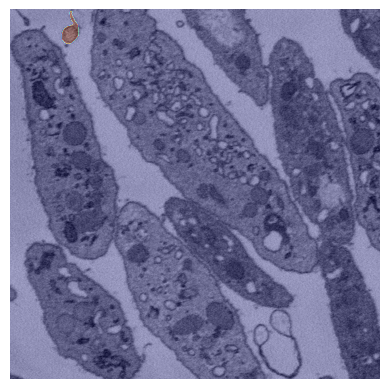

In [ ]:
# Display the original image
plt.imshow(orig_img, cmap='gray')

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.3)
plt.imshow(cell_masks[4], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()

**Calculating region properties for all objects and saving to a csv file.**

In [ ]:
import pandas as pd
from skimage.measure import regionprops

# Initialize a list to store the properties
props_list = []

# Iterate through all classes
for class_name, masks in masks_by_class.items():
    # Iterate through the masks for this class
    for mask in masks:
        # Convert the mask to an integer type if it's not already
        mask = mask.astype(int)

        # Apply regionprops to the mask
        props = regionprops(mask)

        # Extract the properties you want (e.g., area, perimeter) and add them to the list
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            # Add other properties as needed

            # Append the properties and class name to the list
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

# Convert the list of dictionaries to a DataFrame
props_df = pd.DataFrame(props_list)

# Now props_df contains the properties and class names for all regions

# Save the DataFrame to a CSV file
props_df.to_csv('/content/drive/MyDrive/ColabNotebooks/data/3D-EM-Platelet/YOLOv8_object_properties.csv', index=False)

In [ ]:
props_df

,Class Name,Area,Perimeter
0,Alpha,2007,173.438600
1,Alpha,541,86.284271
2,Alpha,2604,195.681241
3,Alpha,1336,135.982756
4,Alpha,1039,119.840620
...,...,...,...
139,Vessels,228,59.556349
140,Vessels,145,44.142136
141,Vessels,161,47.798990
142,Vessels,85,31.899495


**Plotting results**

In [ ]:
import seaborn as sns


**Swarm plot**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


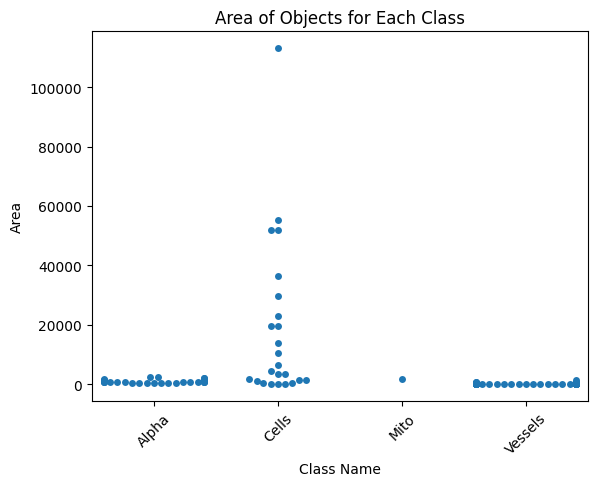

In [ ]:

# Create the swarm plot with Seaborn
sns.swarmplot(x='Class Name', y='Area', data=props_df)

# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Box Plot**

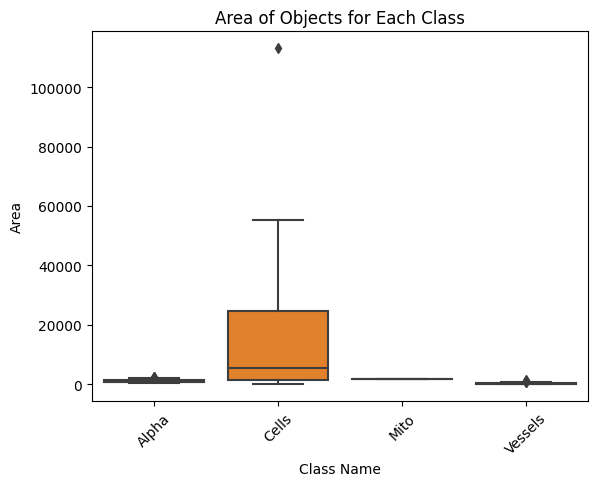

In [ ]:
sns.boxplot(x='Class Name', y='Area', data=props_df)
# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Export model to ONNX for deployment.**

In [ ]:
# Export the model
my_new_model.export(format='onnx', imgsz=[800,800])
